<a href="https://colab.research.google.com/github/pravallika-1305/WISE_ML/blob/main/DecisionTree_PokerHand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data

--2021-04-17 07:06:21--  http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 613694 (599K) [application/x-httpd-php]
Saving to: ‘poker-hand-training-true.data’

poker-hand-training 100%[===================>] 599.31K  3.55MB/s    in 0.2s    

2021-04-17 07:06:21 (3.55 MB/s) - ‘poker-hand-training-true.data’ saved [613694/613694]

--2021-04-17 07:06:21--  http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24538333 (23M) [application/x-httpd-php]
Saving to: ‘poker-hand-testing.data’

poker-han

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df_train=pd.read_csv("poker-hand-training-true.data",names=['Suit #1','Rank #1','Suit #2','Rank #2','Suit #3','Rank #3','Suit #4','Rank #4','Suit #5','Rank #5','Poker Hand'])
df_test = pd.read_csv("poker-hand-testing.data",names=['Suit #1','Rank #1','Suit #2','Rank #2','Suit #3','Rank #3','Suit #4','Rank #4','Suit #5','Rank #5','Poker Hand'])

In [ ]:
df_train.head()

,Suit #1,Rank #1,Suit #2,Rank #2,Suit #3,Rank #3,Suit #4,Rank #4,Suit #5,Rank #5,Poker Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [ ]:
X_train=df_train.drop('Poker Hand',axis=1)
X_test=df_test.drop('Poker Hand',axis=1)

In [ ]:
y_train=df_train['Poker Hand']
y_test=df_test['Poker Hand']

Suit #1          AxesSubplot(0.125,0.657941;0.168478x0.222059)
Rank #1       AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Suit #2       AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Rank #2       AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Suit #3          AxesSubplot(0.125,0.391471;0.168478x0.222059)
Rank #3       AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Suit #4       AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Rank #4       AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Suit #5             AxesSubplot(0.125,0.125;0.168478x0.222059)
Rank #5          AxesSubplot(0.327174,0.125;0.168478x0.222059)
Poker Hand       AxesSubplot(0.529348,0.125;0.168478x0.222059)
dtype: object

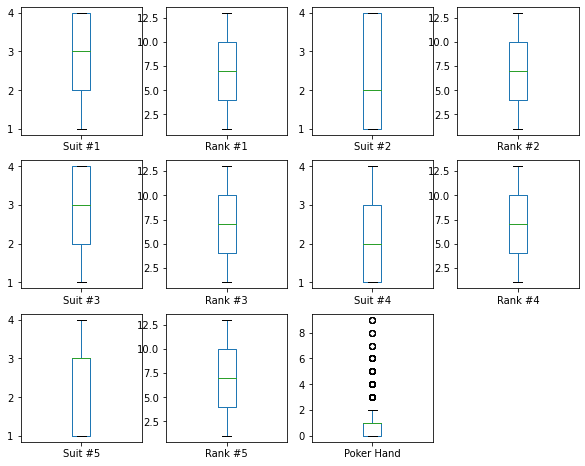

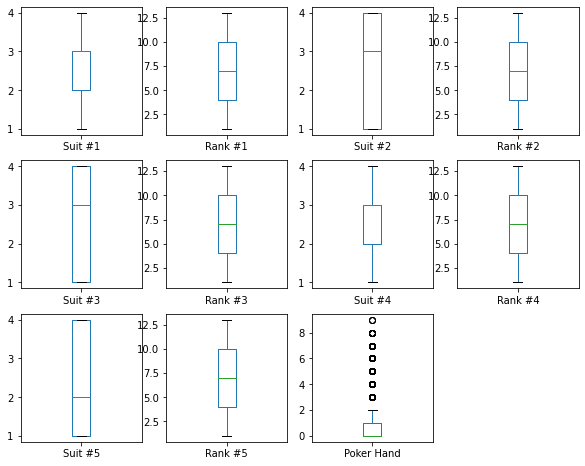

In [ ]:
df_train.plot(kind= 'box' , subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(10,8))
df_test.plot(kind= 'box' , subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(10,8))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [ ]:
def train_using_gini(X_train, y_train): 

    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)
    clf_gini.fit(X_train, y_train) 
    return clf_gini

In [ ]:
def train_using_entropy(X_train, y_train):

    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy

In [ ]:
def prediction(X_test, clf_object): 
    y_pred = clf_object.predict(X_test) 
    return y_pred

In [ ]:
clf_gini = train_using_gini(X_train, y_train) 
clf_entropy = train_using_entropy(X_train, y_train)

In [ ]:
y_pred_gini = prediction(X_train, clf_gini) 
print("Training Accuracy:" + str(accuracy_score(y_train, y_pred_gini)*100))

y_pred_gini_test = prediction(X_test, clf_gini) 
print("Testing Accuracy:" + str(accuracy_score(y_test, y_pred_gini_test)*100))

Training Accuracy:100.0
Testing Accuracy:47.8689


In [ ]:
y_pred_entropy = prediction(X_train, clf_entropy)
print("Training Accuracy:" + str(accuracy_score(y_train, y_pred_entropy)*100))

y_pred_entropy_test = prediction(X_test, clf_entropy) 
print("Testing Accuracy:" + str(accuracy_score(y_test, y_pred_entropy_test)*100))

Training Accuracy:100.0
Testing Accuracy:50.814099999999996


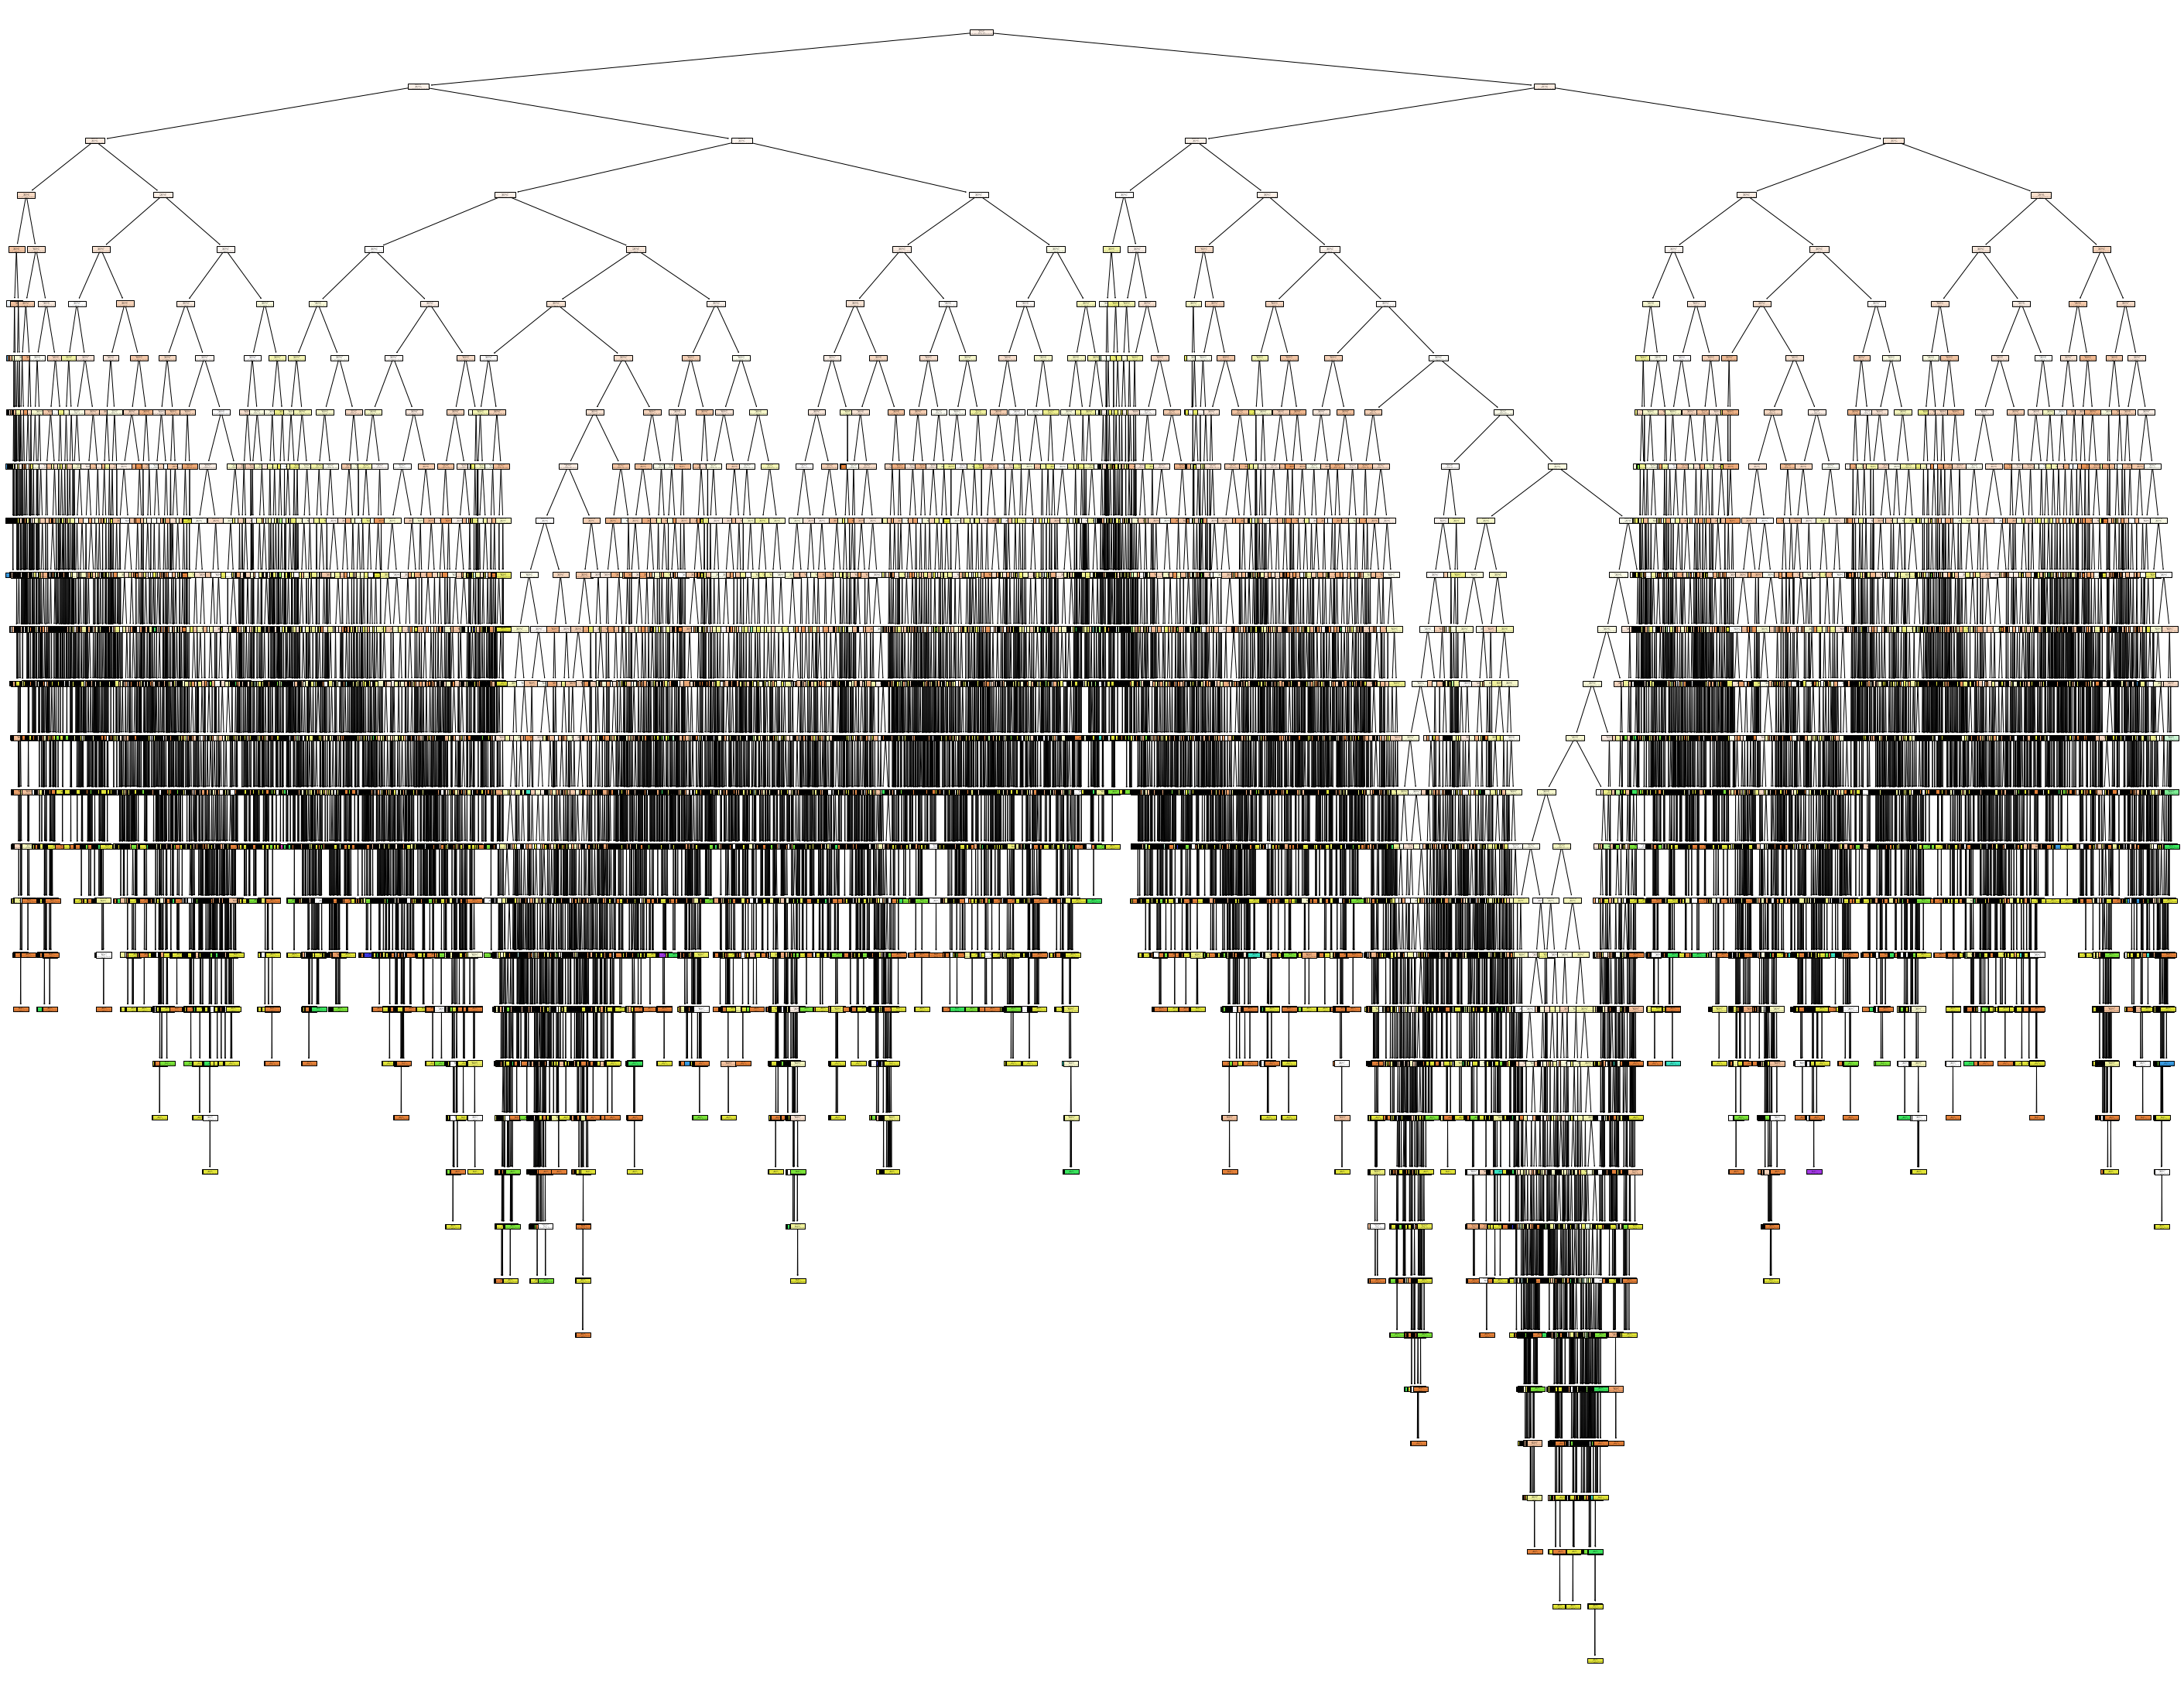

In [ ]:
fig = plt.figure(figsize=(50, 40))
plot_tree(clf_gini, filled=True, feature_names=X_train.columns, class_names=[str(i) for i in df_train['Poker Hand'].unique()])
plt.show()

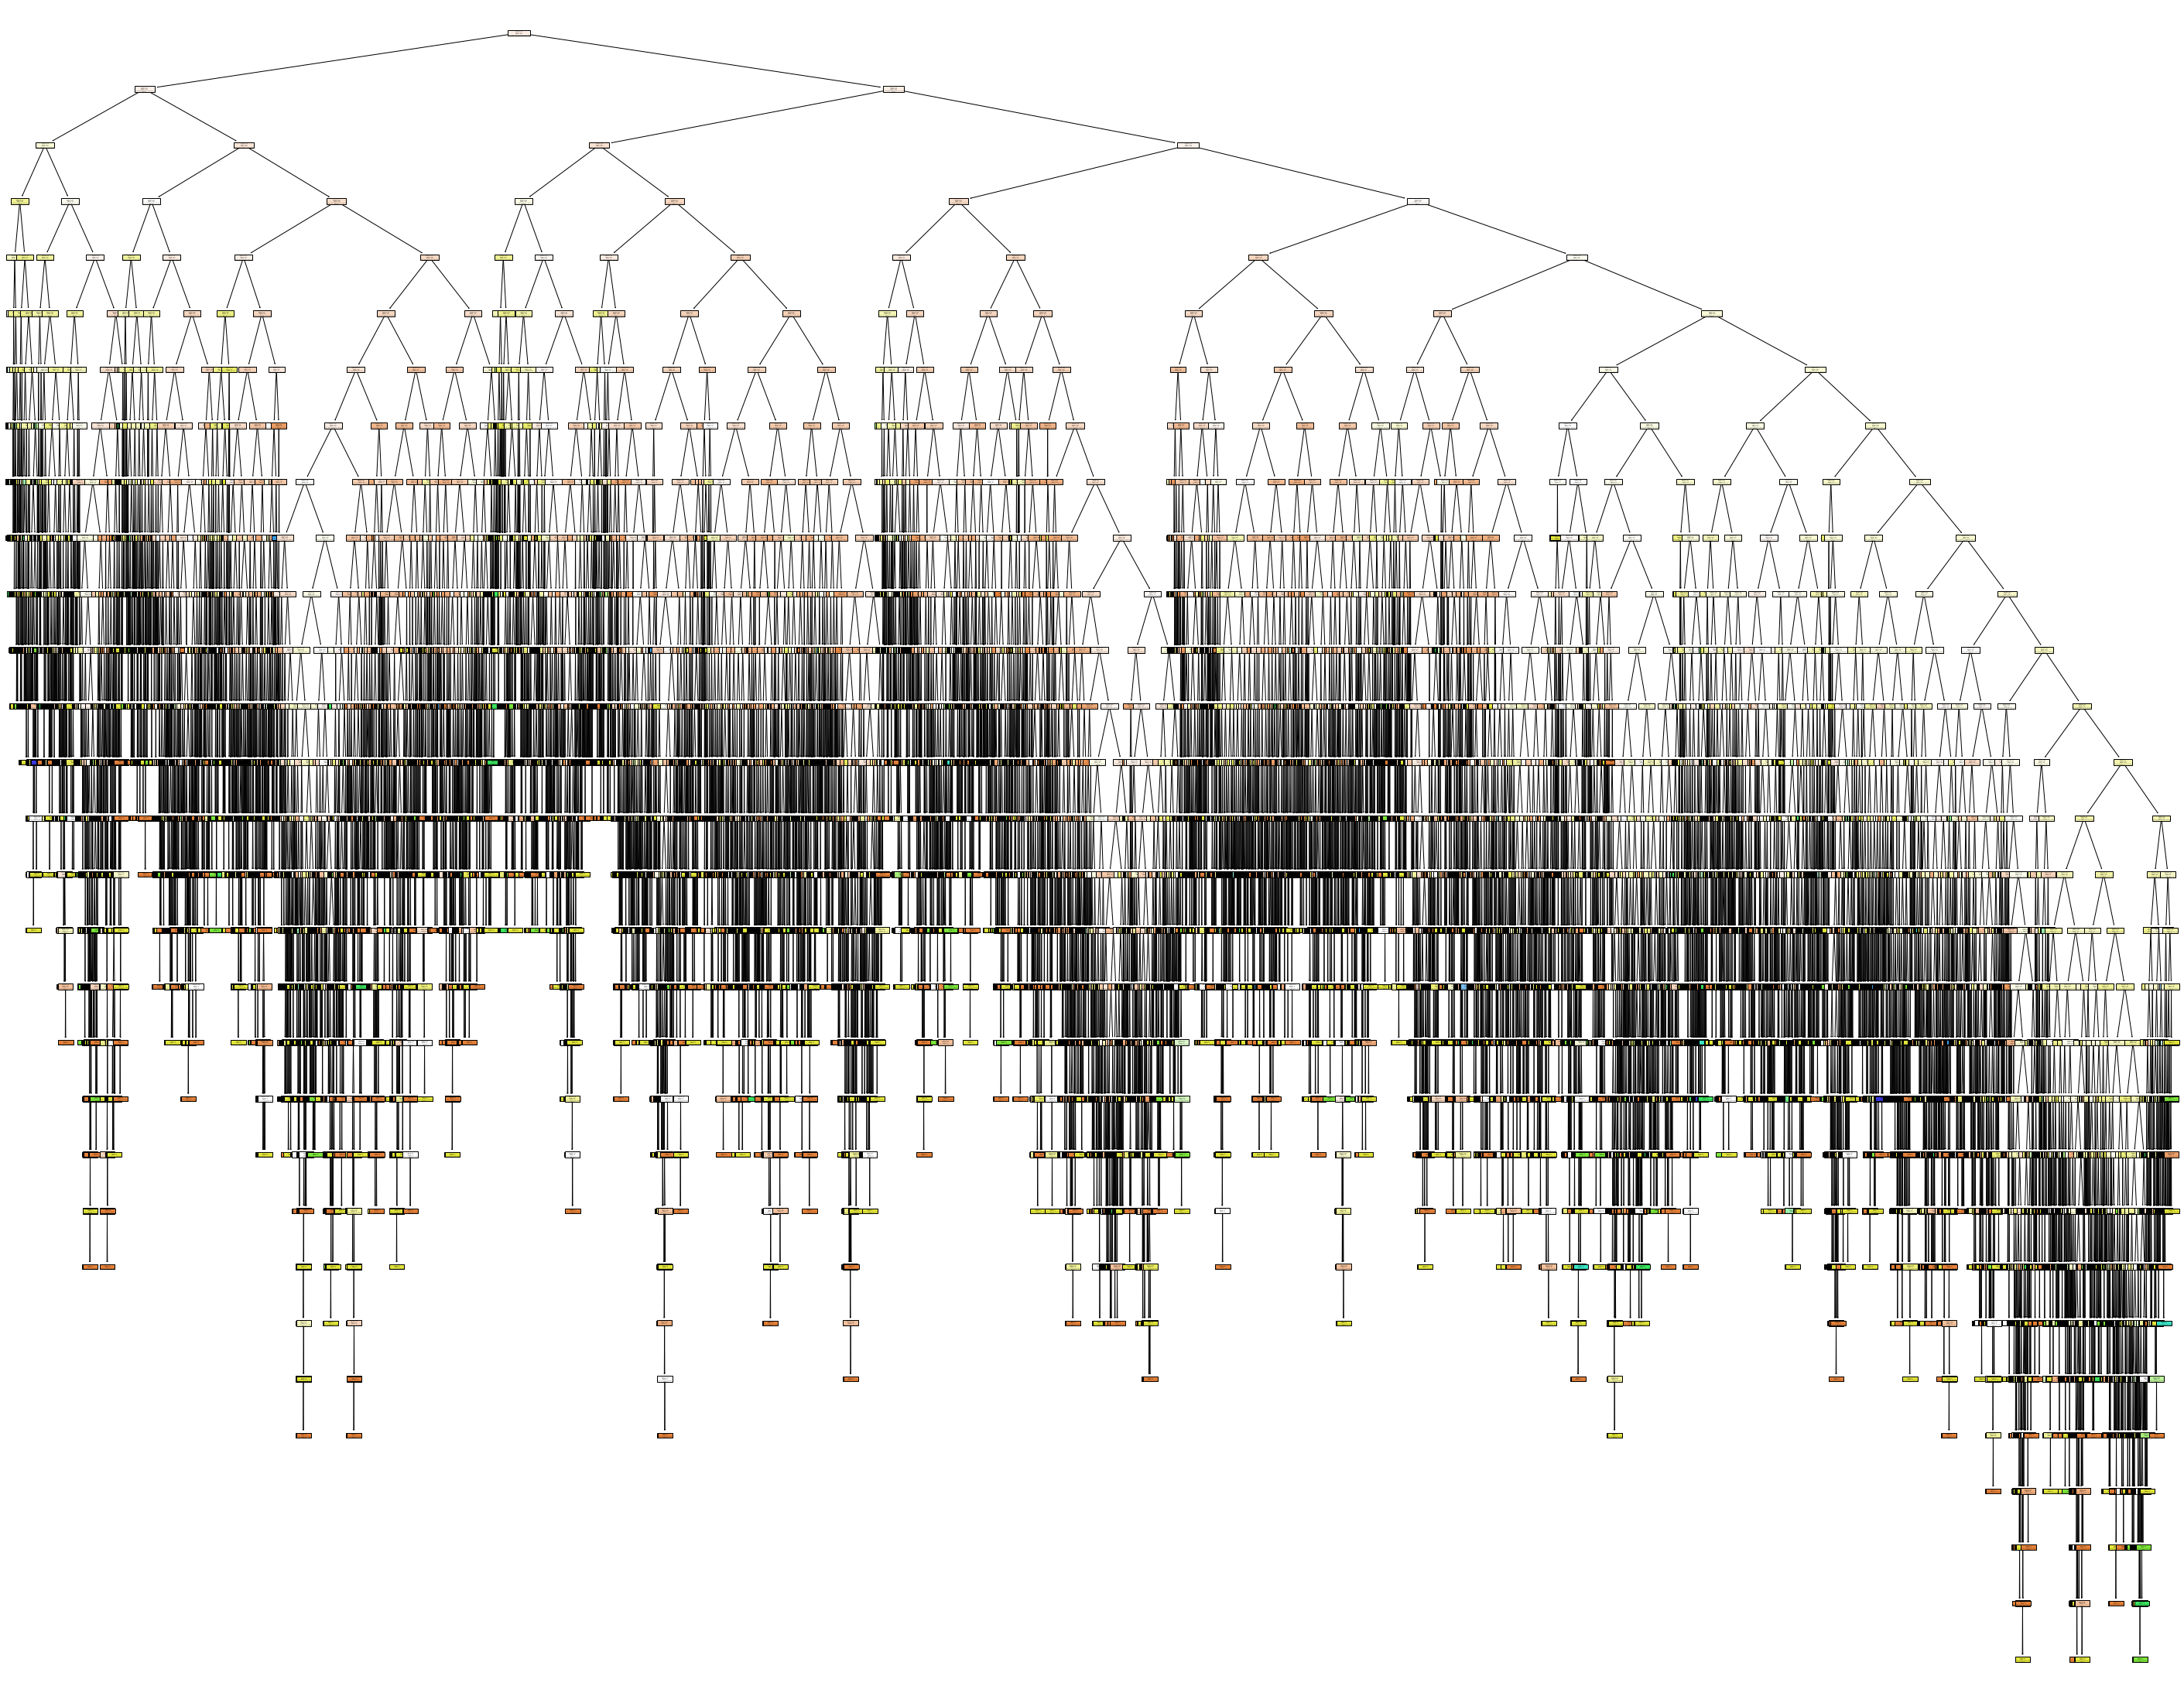

In [34]:
fig = plt.figure(figsize=(50, 40))
plot_tree(clf_entropy, filled=True, feature_names=X_train.columns, class_names=[str(i) for i in df_train['Poker Hand'].unique()])
plt.show()